<a href="https://colab.research.google.com/github/kavya-sree-chandhi/Automobile-Price-Prediction-and-Analysis-using-Machine-Learning-Introducing-the-Subject-Matter/blob/main/Automobile_Price_Prediction_and_Analysis_using_Machine_Learning_Introducing_the_Subject_Matter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Automobile Price Prediction and Analysis using Machine Learning: Introducing the Subject Matter**

## ***Imports and Setup***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,8)})

## ***EDA***


In [ ]:
data=pd.read_csv('/content/CarPrice.csv')

In [ ]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
print("\nDataset Overview:")
display(auto_data.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 190 entries, symboling to fuelsystem_spfi
dtypes: bool(175), float64(8), int64(7)
memory usage: 59.2 KB


None

In [ ]:
print("\nBasic Statistics:")
display(auto_data.describe().T)


Basic Statistics:


,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [ ]:
df.isnull().sum()

,0
symboling,0
make,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0
carlength,0


In [ ]:
data=data.drop(['car_ID'],axis=1)

In [ ]:
data['CarBrand'] = data['CarName'].str.split(' ', expand=True)[0]


In [ ]:
data['CarName'] = data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota',
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [ ]:
data['symboling']=data['symboling'].astype('str')

In [ ]:
categorical_cols=data.select_dtypes(include=['object']).columns

In [ ]:
# Save cleaned data to a new CSV file
output_file_path = 'cleaned_CarPrice.csv'
data.to_csv(output_file_path, index=False)
print(f"Cleaned data saved to {output_file_path}")

Cleaned data saved to cleaned_CarPrice.csv


In [ ]:
data[categorical_cols].head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarBrand
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero


In [ ]:
numerical_cols=data.select_dtypes(exclude=['object']).columns

In [ ]:
data[numerical_cols].head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0


In [ ]:
data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


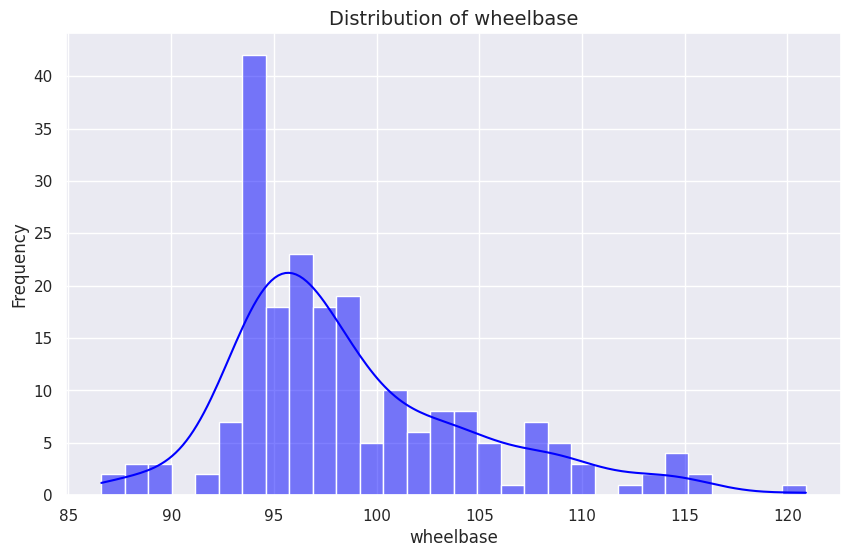

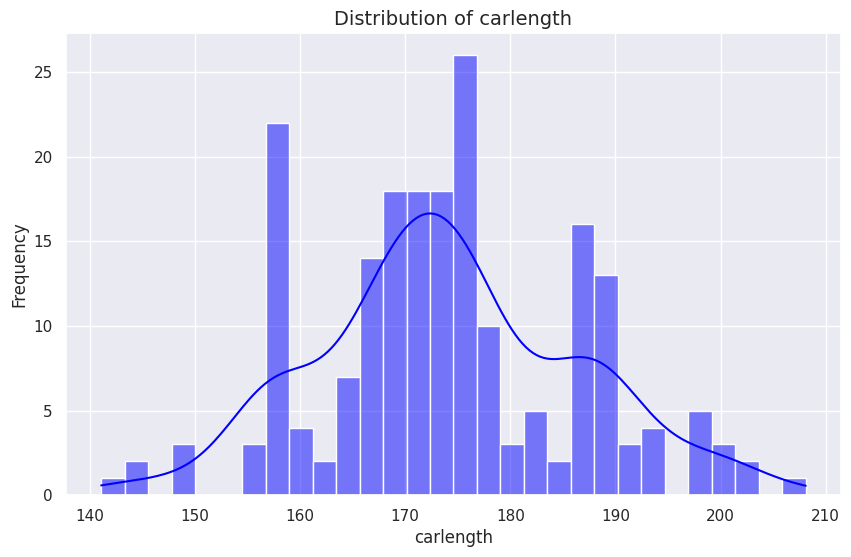

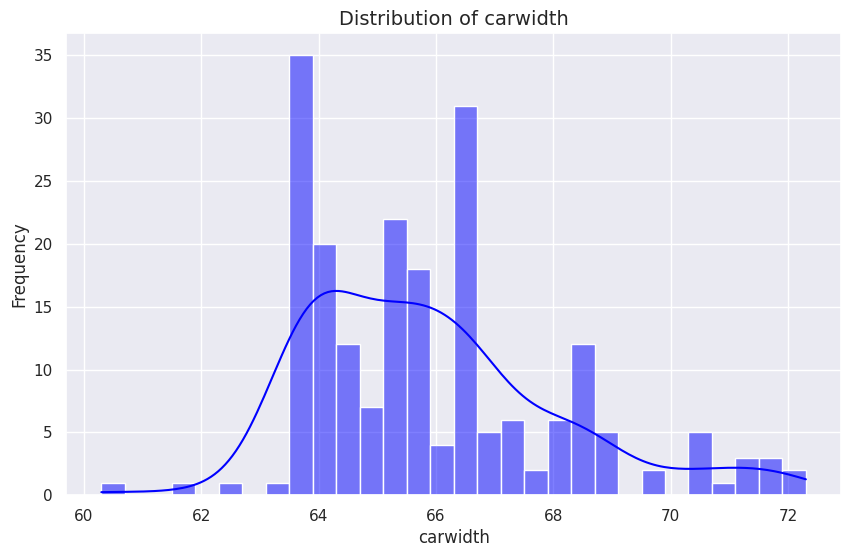

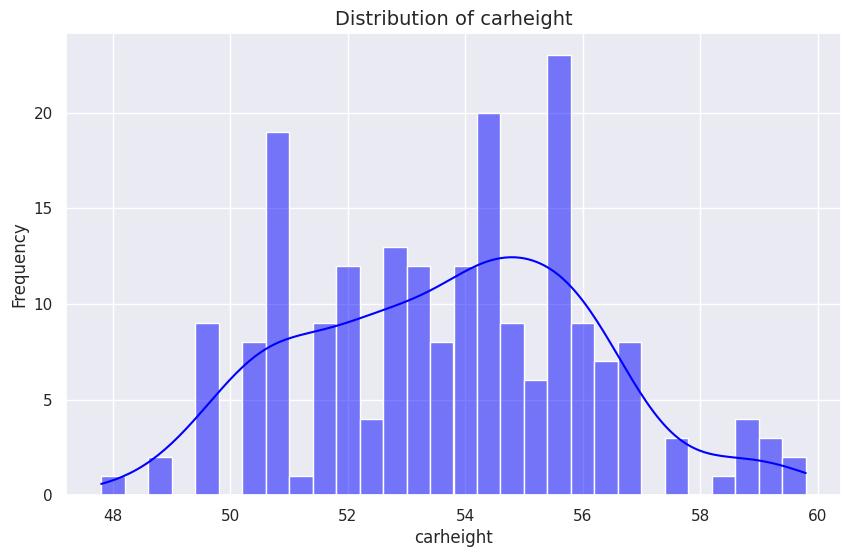

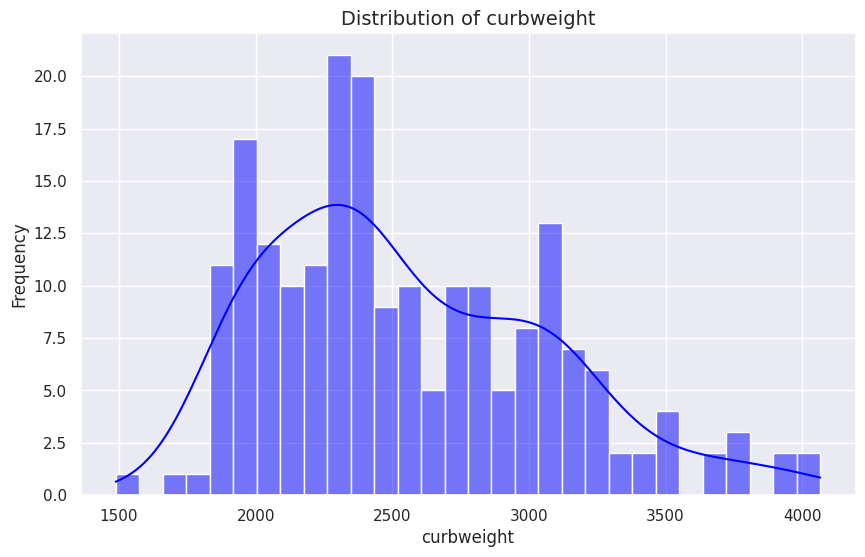

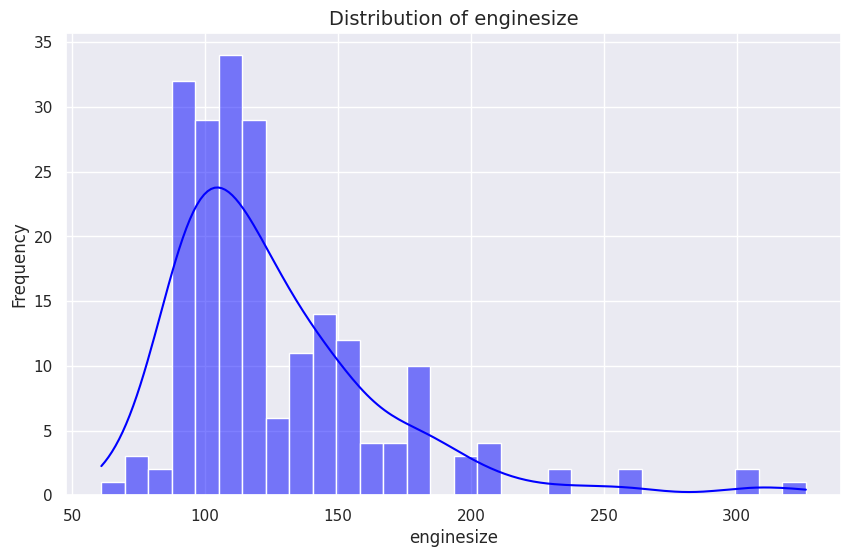

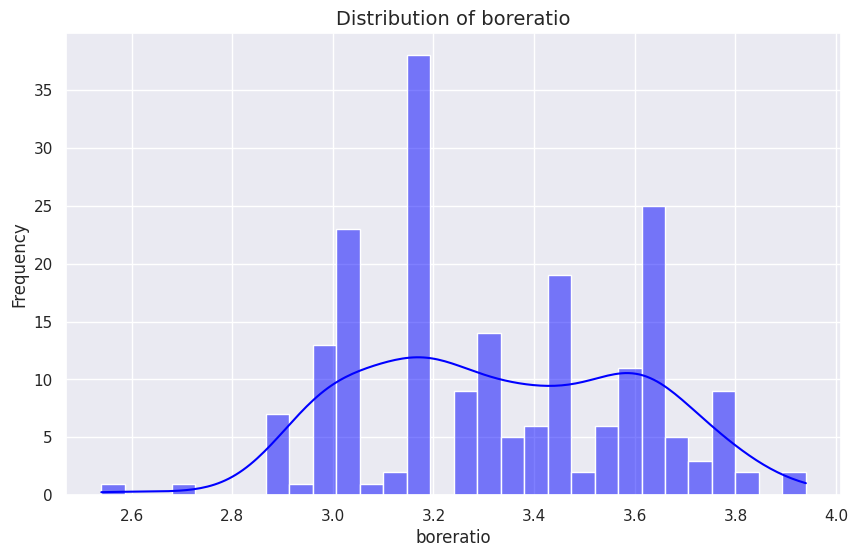

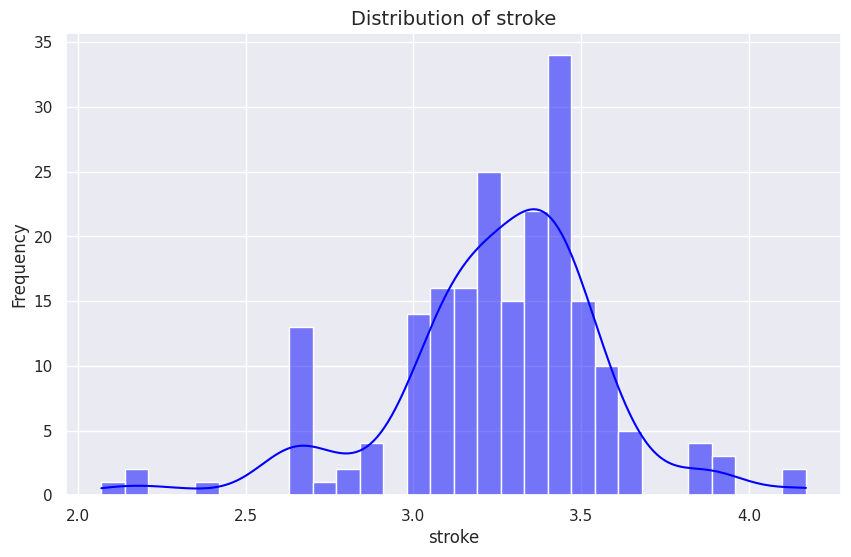

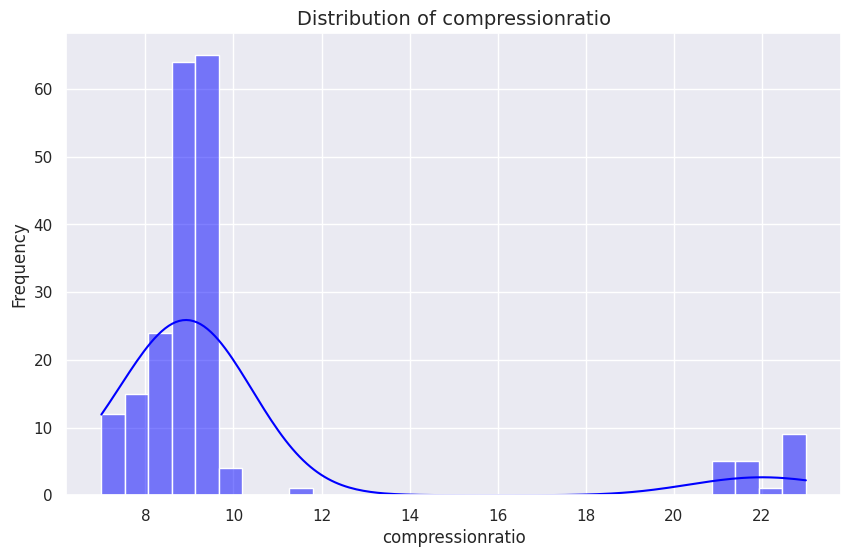

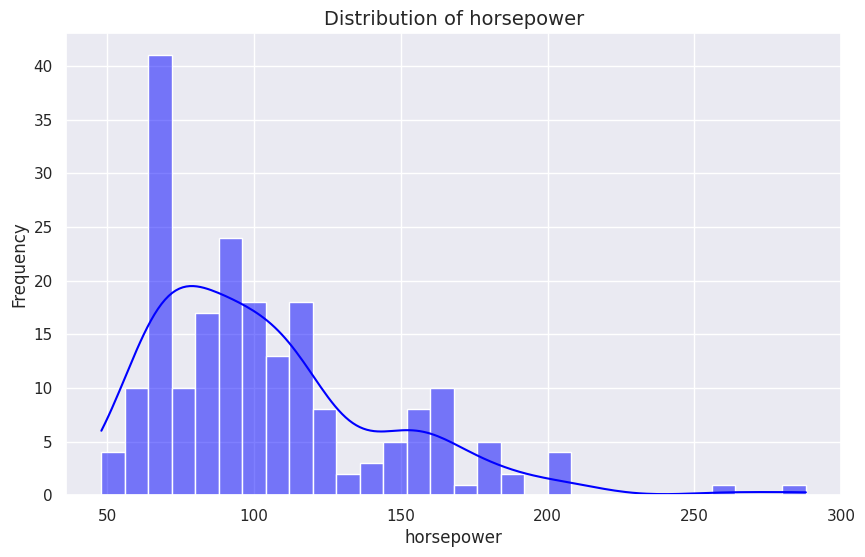

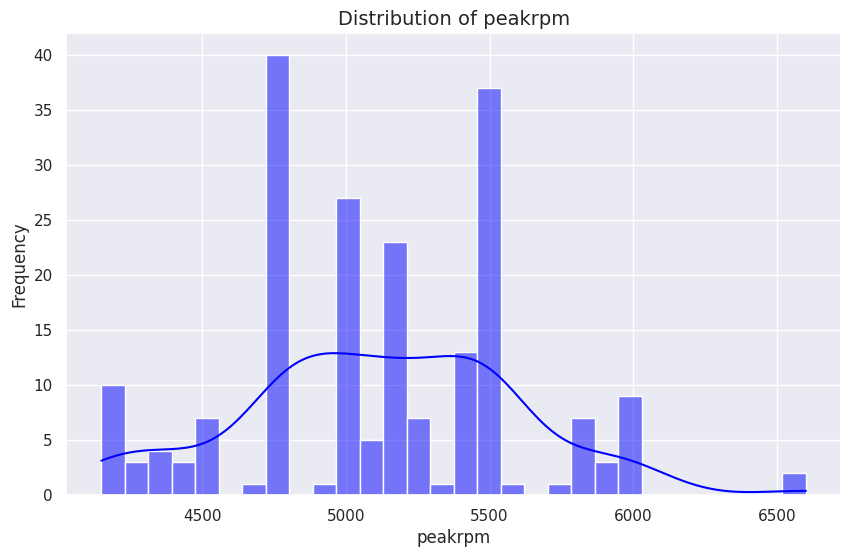

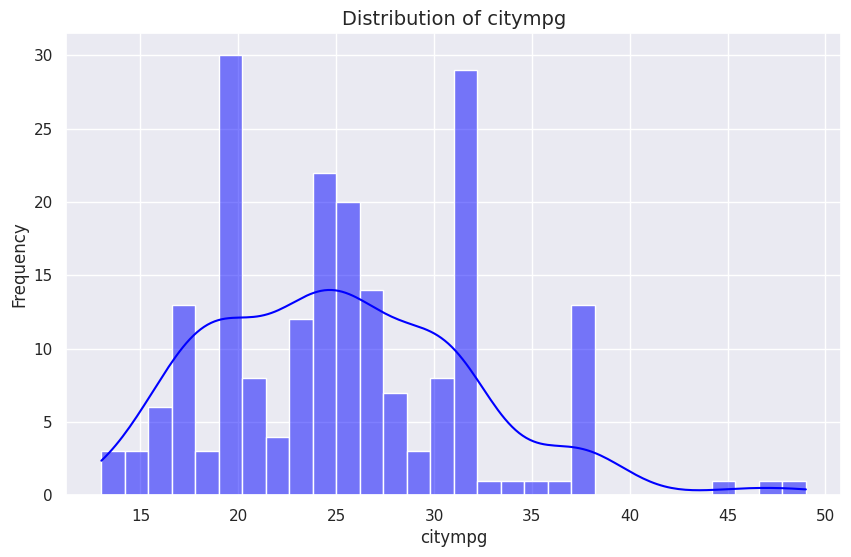

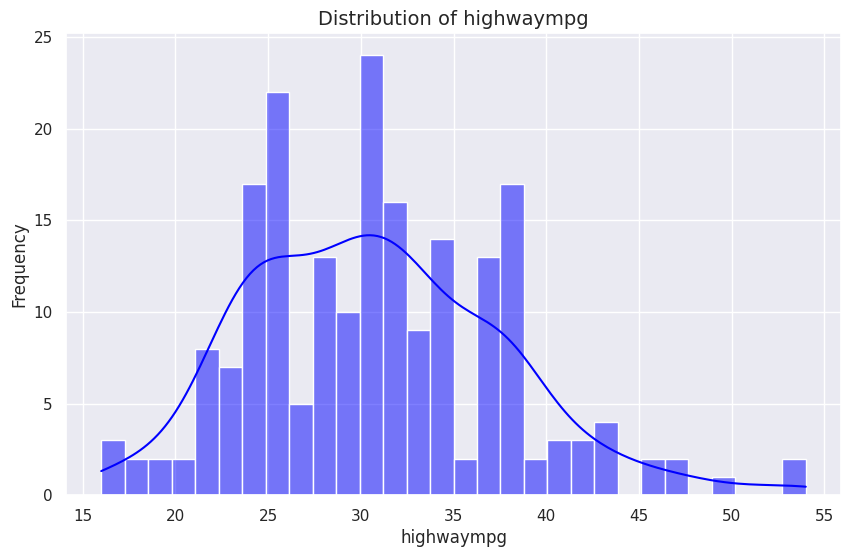

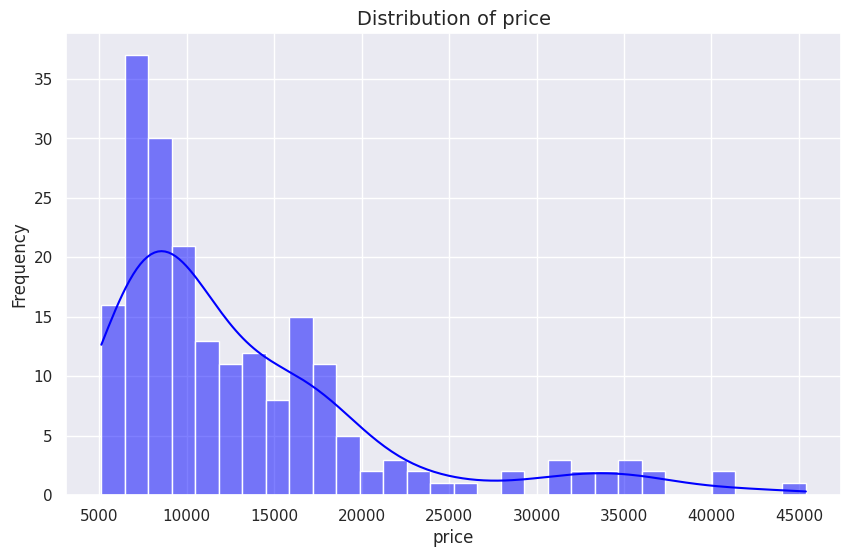

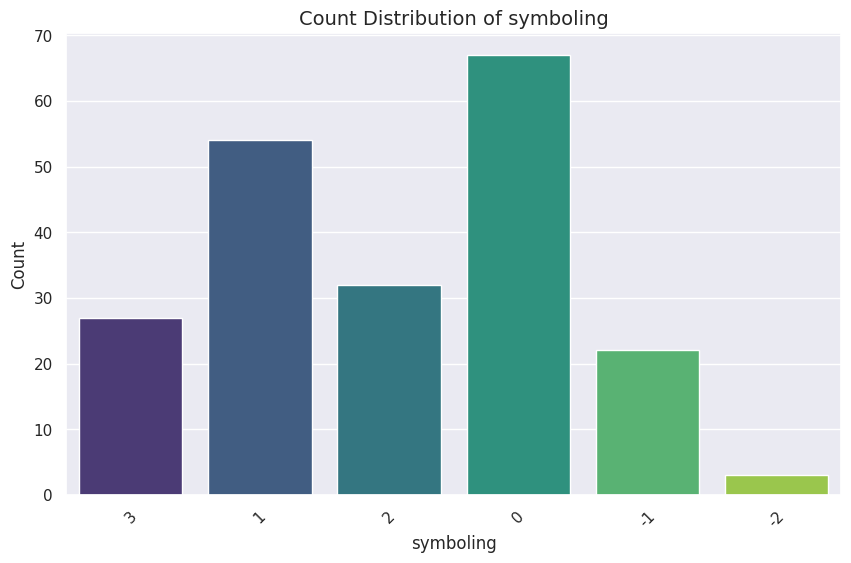

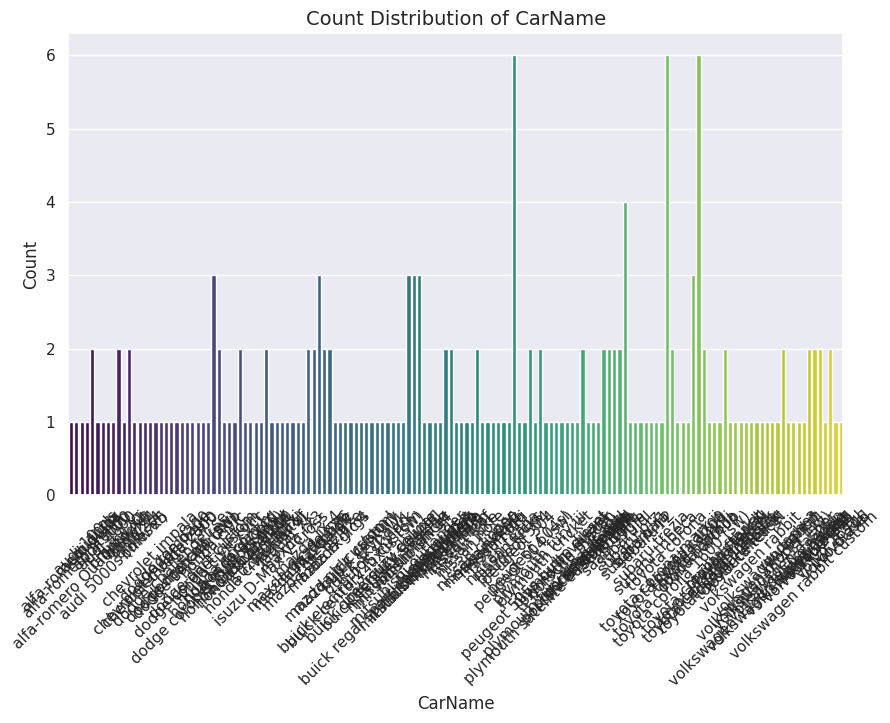

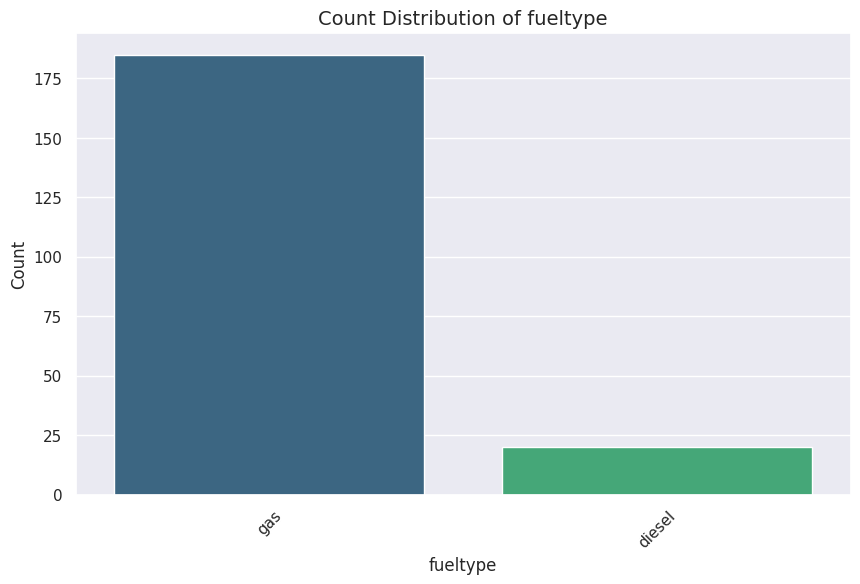

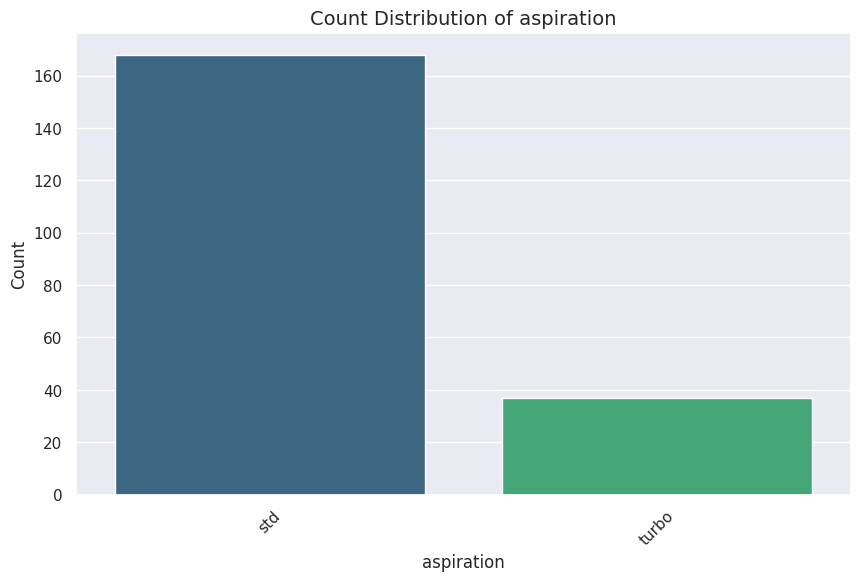

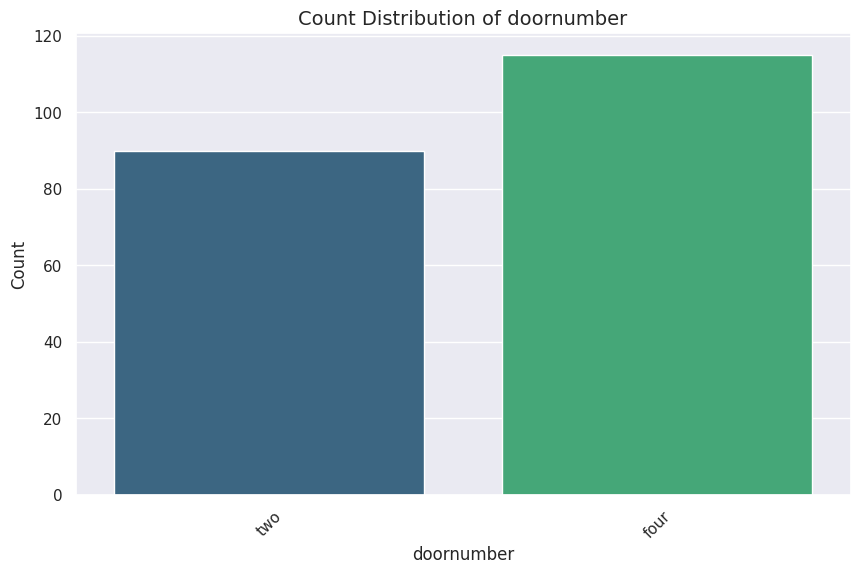

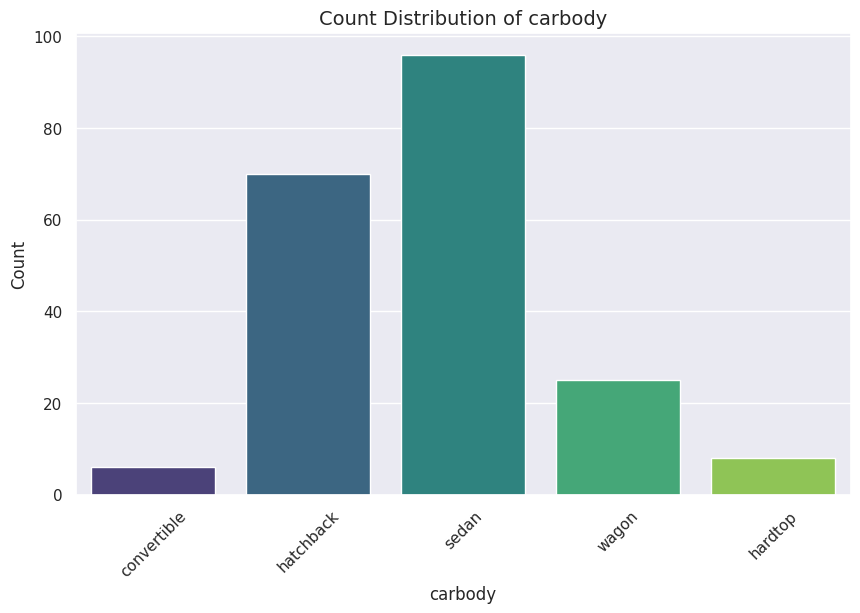

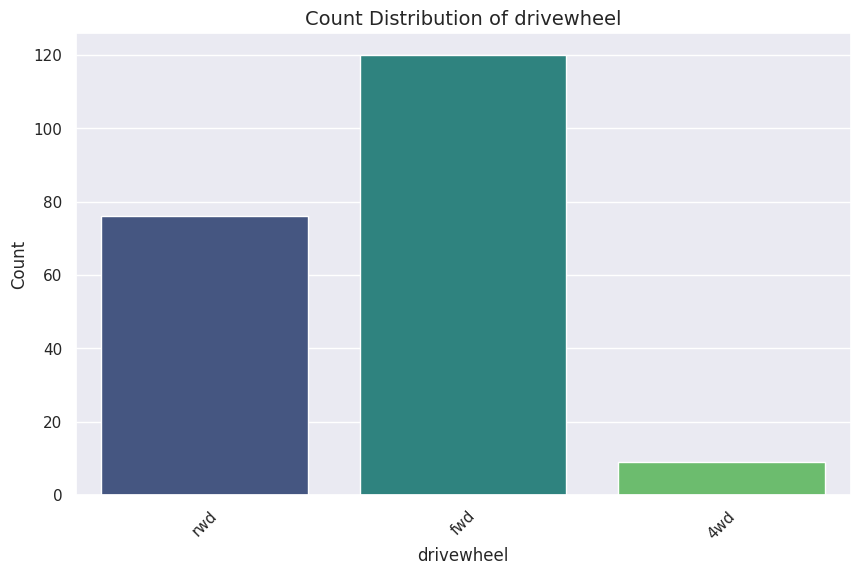

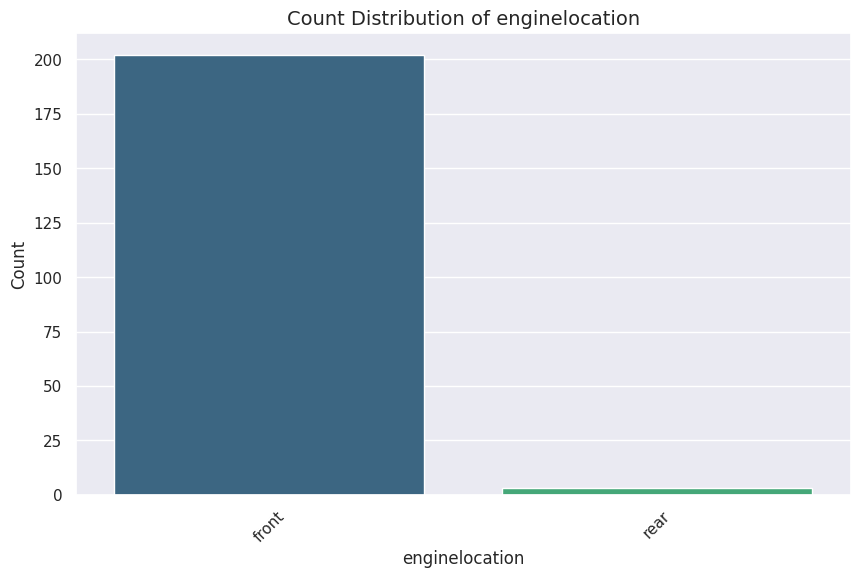

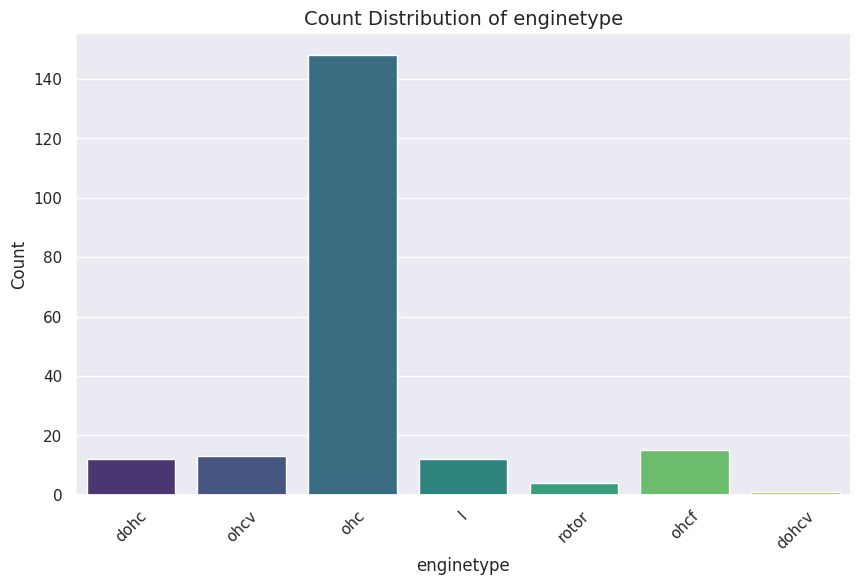

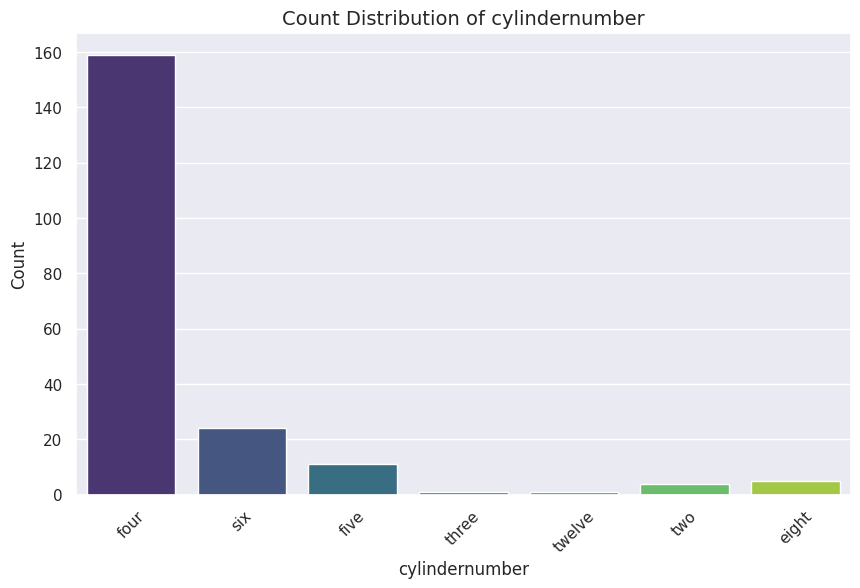

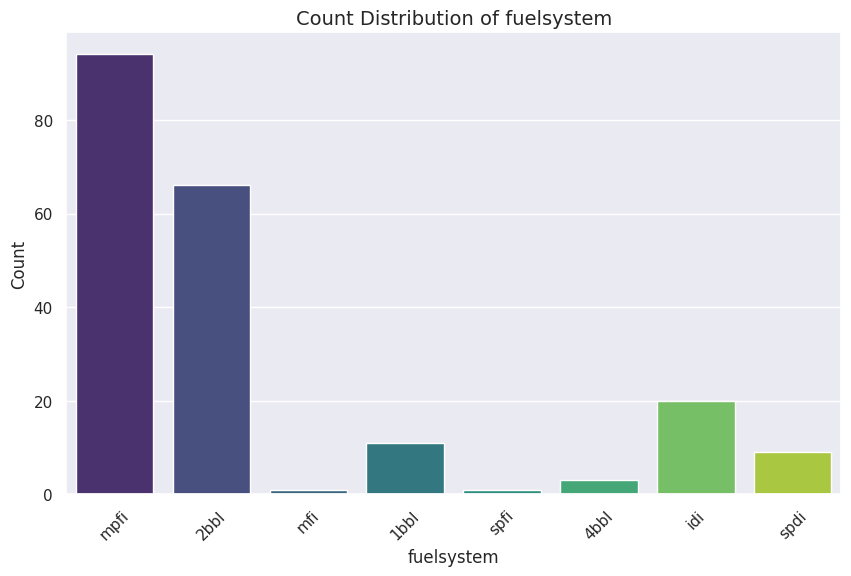

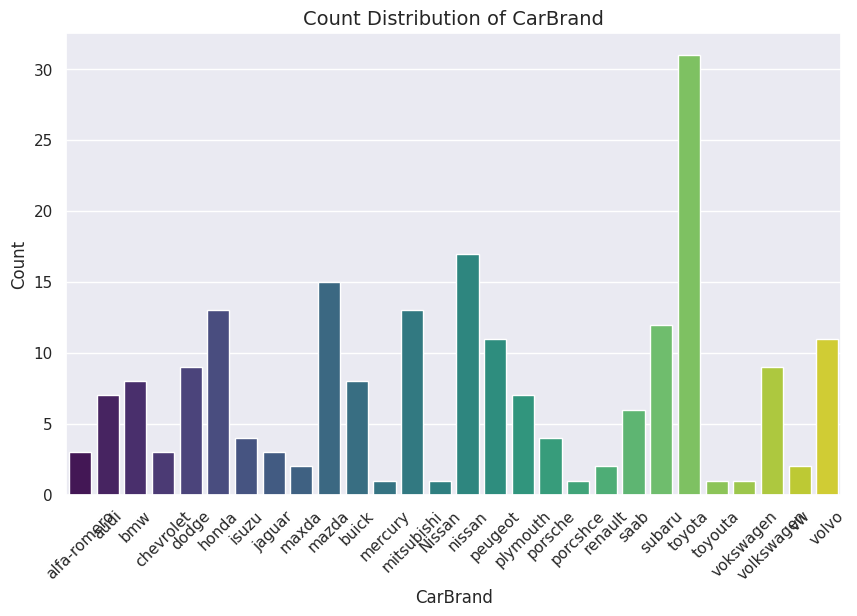

In [ ]:
# Univariate Analysis for numerical variables
numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, color="blue", bins=30)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Univariate Analysis for categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, palette="viridis")
    plt.title(f"Count Distribution of {col}", fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()


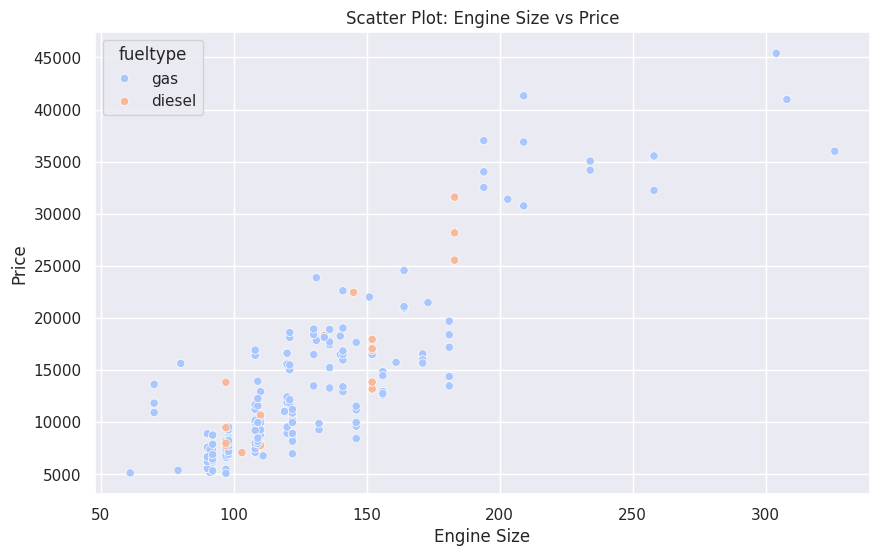

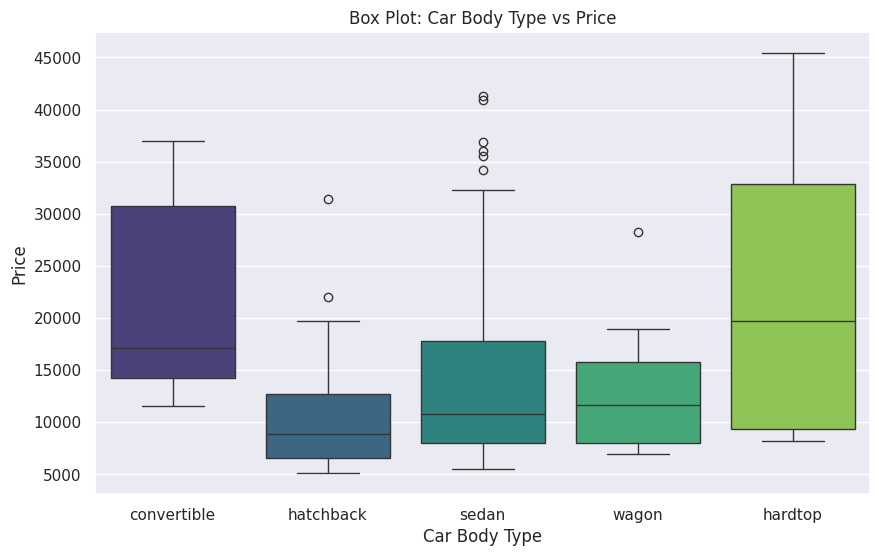

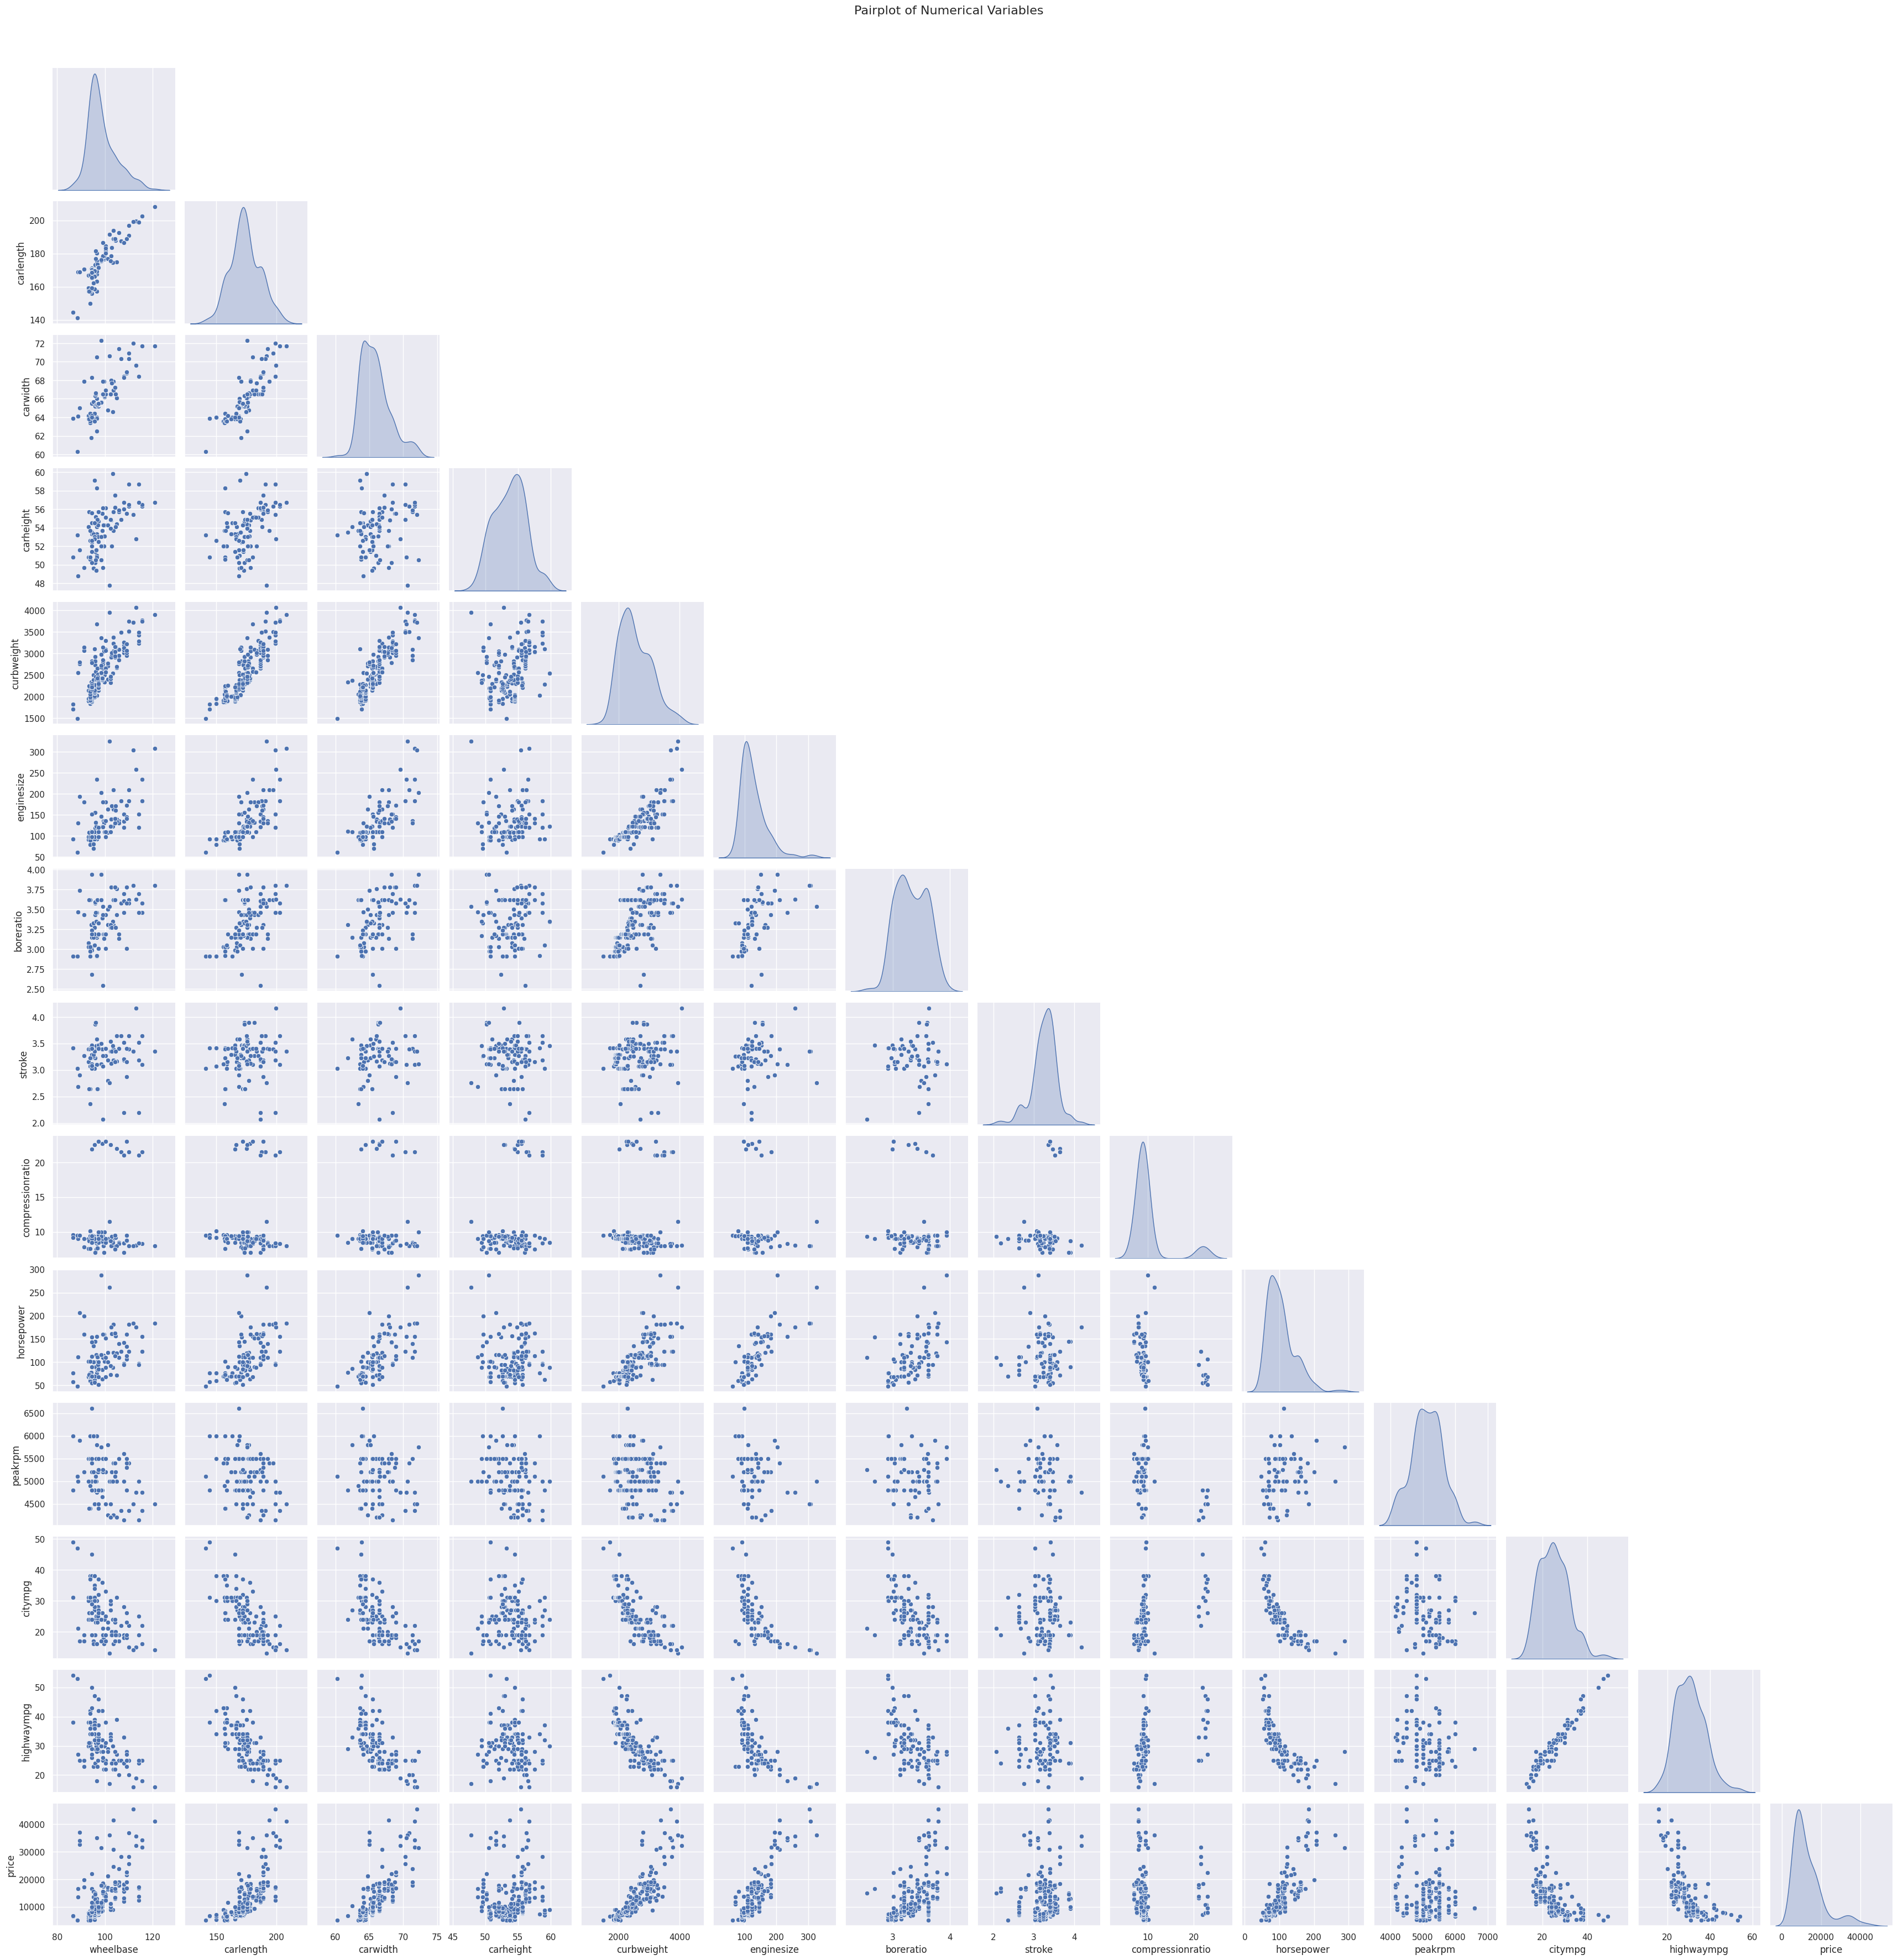

In [ ]:
# Scatter plot: Numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="enginesize", y="price", hue="fueltype", palette="coolwarm")
plt.title("Scatter Plot: Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

# Box plot: Categorical vs numerical
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="carbody", y="price", palette="viridis")
plt.title("Box Plot: Car Body Type vs Price")
plt.xlabel("Car Body Type")
plt.ylabel("Price")
plt.show()

# Pairplot for numerical relationships
sns.pairplot(data[numerical_cols], diag_kind="kde", corner=True, palette="husl")
plt.suptitle("Pairplot of Numerical Variables", y=1.02, fontsize=16)
plt.show()


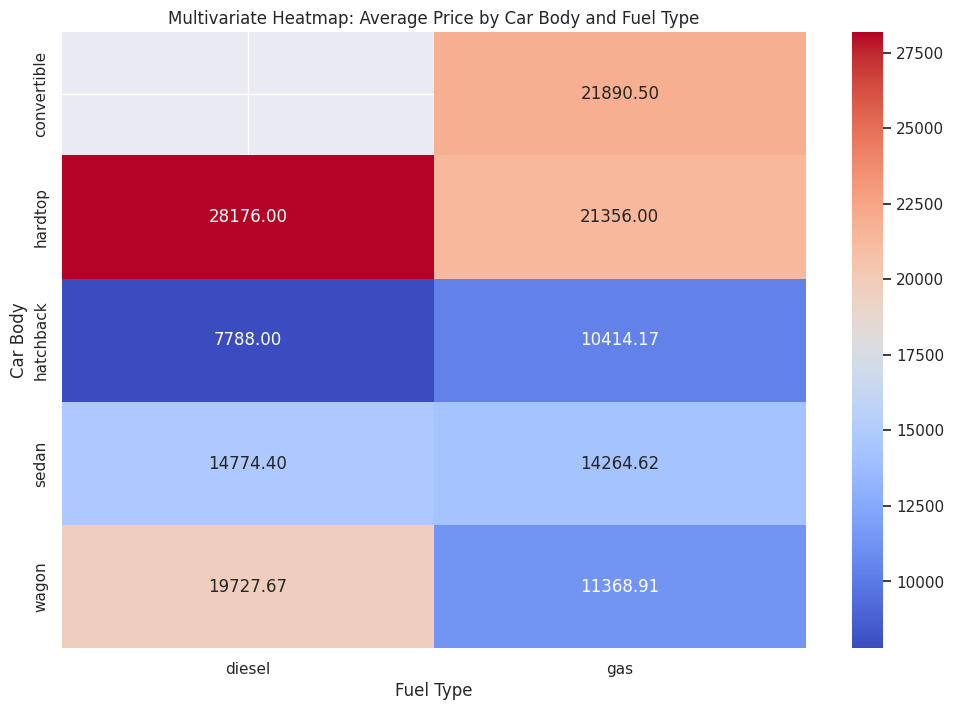

In [ ]:
# Heatmap with multiple dimensions
pivot_data = data.pivot_table(index="carbody", columns="fueltype", values="price", aggfunc="mean")

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Multivariate Heatmap: Average Price by Car Body and Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Car Body")
plt.show()

# 3D scatter plot (if you use Plotly for interactivity)
import plotly.express as px
fig = px.scatter_3d(data, x="enginesize", y="price", z="horsepower", color="fueltype",
                    size="curbweight", title="3D Scatter Plot: Engine Size, Price, Horsepower")
fig.show()


## **Hypothesis 1:  Engine Size and Fuel Efficiency Hypothesis:**
"As the engine size increases, the highway miles per gallon (MPG) will decrease due to the higher fuel consumption of larger engines, with different fuel types showing varying levels of efficiency."

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import numpy as np

# Load the data
data = pd.read_csv('/content/CarPrice.csv')

def create_price_engine_size_plot(data):
    # Create interactive scatter plot
    fig = px.scatter(data, x='enginesize', y='price',
                     color='fueltype',
                     title='Car Price vs Engine Size: Fuel Type Comparison',
                     labels={'enginesize': 'Engine Size', 'price': 'Price'},
                     hover_data=['CarName', 'horsepower', 'carbody'])

    # Add trendline
    fig.add_trace(
        go.Scatter(
            x=data['enginesize'],
            y=np.poly1d(np.polyfit(data['enginesize'], data['price'], 1))(data['enginesize']),
            mode='lines',
            name='Price Trend Line',
            line=dict(color='red', dash='dot')
        )
    )

    # Interactive elements
    fig.update_layout(
        updatemenus=[
            # Scale toggle for price
            dict(
                buttons=[
                    {'label': 'Linear Scale', 'method': 'relayout', 'args': [{'yaxis.type': 'linear'}]},
                    {'label': 'Log Scale', 'method': 'relayout', 'args': [{'yaxis.type': 'log'}]}
                ],
                direction='down',
                showactive=True,
                x=1.1,
                xanchor='left',
                y=1.1,
                yanchor='top'
            ),
            # Color mapping toggle
            dict(
                buttons=[
                    {'label': 'Fuel Type', 'method': 'restyle', 'args': [{'marker.color': [data['fueltype']]}]},
                    {'label': 'Drive Wheel', 'method': 'restyle', 'args': [{'marker.color': [data['drivewheel']]}]}
                ],
                direction='down',
                showactive=True,
                x=1.2,
                xanchor='left',
                y=1.1,
                yanchor='top'
            )
        ],
        # Add range slider
        xaxis=dict(
            rangeslider=dict(visible=True),
            title="Engine Size"
        )
    )

    return fig

# Create and show the plot
price_engine_size_plot = create_price_engine_size_plot(data)
price_engine_size_plot.show()

## **Hypothesis 2: Price and Car Body Type Hypothesis:**
"Luxury car body types (such as convertibles and coupes) will demonstrate significantly higher price ranges compared to more utilitarian body types (like sedans and hatchbacks), reflecting differences in market positioning and perceived value."

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

# Load the data
data = pd.read_csv('/content/CarPrice.csv')

def create_carbody_price_plot(data):
    # Create box plot with swarm overlay
    fig = go.Figure()

    # Add box plot
    fig.add_trace(go.Box(
        x=data['carbody'],
        y=data['price'],
        name='Price Distribution',
        boxpoints='outliers',
        marker_color='rgb(107,174,214)'
    ))

    # Add swarm plot
    fig.add_trace(go.Box(
        x=data['carbody'],
        y=data['price'],
        boxpoints='all',
        jitter=0.3,
        pointpos=-1.8,
        name='Individual Prices',
        marker=dict(
            color='rgb(255,127,14)',
            opacity=0.5
        )
    ))

    # Customize layout
    fig.update_layout(
        title='Price Distribution Across Car Body Types',
        xaxis_title='Car Body Type',
        yaxis_title='Price',
        updatemenus=[
            # Price range selector
            dict(
                buttons=[
                    {'label': 'All Prices', 'method': 'relayout', 'args': [{'yaxis.range': [None, None]}]},
                    {'label': '5k-30k', 'method': 'relayout', 'args': [{'yaxis.range': [5000, 30000]}]},
                    {'label': '10k-50k', 'method': 'relayout', 'args': [{'yaxis.range': [10000, 50000]}]}
                ],
                direction='down',
                showactive=True,
                x=1.1,
                xanchor='left',
                y=1.1,
                yanchor='top'
            ),
            # Statistical view toggle
            dict(
                buttons=[
                    {'label': 'Box Plot', 'method': 'restyle', 'args': [{'type': 'box'}]},
                    {'label': 'Violin Plot', 'method': 'restyle', 'args': [{'type': 'violin'}]}
                ],
                direction='down',
                showactive=True,
                x=1.2,
                xanchor='left',
                y=1.1,
                yanchor='top'
            )
        ]
    )

    return fig

# Create and show the plot
carbody_price_plot = create_carbody_price_plot(data)
carbody_price_plot.show()

## **"Hypothesis 3: Cars with higher horsepower tend to have high price."**
"Cars with higher horsepower are associated with higher average prices, as increased horsepower typically correlates with better performance and premium features, which tend to command higher market values."


In [ ]:
import plotly.graph_objs as go

# Group data by 'horsepower' and calculate the average price
horsepower_price = data.groupby('horsepower')['price'].mean().reset_index()

# Create interactive Plotly bar chart
fig = go.Figure(data=[
    go.Bar(
        x=horsepower_price['horsepower'],
        y=horsepower_price['price'],
        marker_color='orange',
        text=horsepower_price['price'].round(2),  # Add value labels
        hovertemplate='<b>Horsepower</b>: %{x}<br>' +
                      '<b>Avg Price</b>: %{y:.2f}<extra></extra>',
        textposition='outside'  # Show text labels above bars
    )
])

# Add zoom and pan capabilities
fig.update_layout(
    title='Average Price by Horsepower',
    title_font_size=16,
    xaxis_title='Horsepower',
    yaxis_title='Average Price',
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    dragmode='zoom',
)

# Add a range slider for the horsepower axis
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),
        type="linear"
    )
)

# Show the interactive plot
fig.show()
